<a href="https://colab.research.google.com/github/arnauldmwafise/arnauldmwafise/blob/main/Computational_and_Combinatorial_Enumeration_of_Poset_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook provides a computational framework for the study and enumeration of poset matrices. It implements the theoretical constructions found in *Operad Structure of Poset Matrices*(arXiv:2401.06814) and the algorithms detailed in *Computational and Combinatorial Enumeration of Poset Matrices* (OSF Preprints).




In [ ]:
# Core math and combinatorial utilities
import numpy as np
import itertools
# Graph theory and visualization
import networkx as nx
import matplotlib.pyplot as plt



In [ ]:
def isBinary(inputarray):
  """
  Checks if all elements in the input array are either 0 or 1.

  Args:
      inputarray (numpy.ndarray): The array or matrix to be validated.

  Returns:
      bool: True if the array contains only binary values (0 and 1), False otherwise.

  Complexity:
      Time: O(n), where n is the total number of elements in the array.
            The function performs a single pass to evaluate the boolean conditions.
      Space: O(n) in the worst case for the intermediate boolean mask created
             by the vectorized comparison, or O(1) if optimized by the engine.
  """
  return ((inputarray == 0) | (inputarray == 1)).all()


In [ ]:
def validate_poset_matrix(inputndarray):
    r"""
    Validate if a 2D NumPy array represents a poset matrix.

    A matrix represents a poset if it is binary, triangular (representing
    an ordered structure), and transitively closed. Transitivity is
    verified by checking if the zero-pattern of the matrix is invariant
    under squaring in Boolean-like logic.

    Parameters
    ----------
    inputndarray : np.ndarray
        A square 2D NumPy array to be tested.

    Returns
    -------
    bool
        True if the array satisfies the conditions of a poset matrix
        (binary, triangular, and transitive), False otherwise.

    Notes
    -----
    **Complexity Analysis:**
    - **Time Complexity:** $O(N^3)$
      The dominant operation is the matrix multiplication `np.matmul`,
      which takes $O(N^3)$ for an $N \times N$ matrix. The triangularity
      checks and zero-pattern comparisons take $O(N^2)$.
    - **Space Complexity:** $O(N^2)$
      Required to store the product matrix `mat` and the lists of
      coordinate positions for zero-entries.
    """
    # 1. Quick check: Is it square?
    if inputndarray.ndim != 2 or inputndarray.shape[0] != inputndarray.shape[1]:
        return False
    # 1. Check if binary and triangular
    if isBinary(inputndarray) and (np.allclose(inputndarray, np.tril(inputndarray)) or
                                   np.allclose(inputndarray, np.triu(inputndarray))):

        # 2. Check for transitivity via squaring
        mat = np.matmul(inputndarray, inputndarray)
        initial_positions = list(zip(*np.where(inputndarray == 0)))
        updated_positions = list(zip(*np.where(mat == 0)))

        if updated_positions == initial_positions:
            return True
        else:
            return False
    else:
        return False


In [ ]:
# Representative poset matrix (Example of a 5x5 lower-triangular relation)
matrix1=np.array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1]])

In [ ]:
# Validate that the matrix satisfies the structural properties of a poset
validate_poset_matrix(matrix1)

True

In [ ]:
 # Representative poset matrix (Example of a 4x4 lower-triangular relation)
 matrix2= np.array([[1, 0, 0, 0],
    [1, 1, 0, 0],
    [1, 0, 1, 0],[1, 1, 1, 1]])

In [ ]:
# Validate that the matrix satisfies the structural properties of a poset
validate_poset_matrix(matrix2)

True

In [ ]:
 # Representative non-poset matrix (Example of a 3x3 lower-triangular relation)
matrix3=np.array([[1,0,0],[1,1,0],[0,1,1]])

In [ ]:
# Validate that the matrix satisfies the structural properties of a poset
validate_poset_matrix(matrix3)

False

In [ ]:
def visualize_poset_from_triangular_matrix(poset_matrix,labels=None):

    """
    Generates and displays the Hasse diagram for a poset given its triangular relation matrix.

    The function filters the full partial order relation to identify covering relations
    (edges in a Hasse diagram) by removing transitive links.

    Args:
        poset_matrix (numpy.ndarray): A square (n x n) binary matrix representing the
            partial order. Matrix[i, j] = 1 implies i ≤ j.
        labels (list, optional): Custom labels for the nodes. Defaults to 1-based indexing.

    Raises:
        ValueError: If the length of the labels list does not match the matrix dimensions.

    Complexity:
        Time: O(n³)
            The function uses a triple-nested loop to check the transitive reduction
            (covering relations) for each pair (i, j) by iterating through all possible
            intermediate elements k.
        Space: O(n + E)
            Stores the nodes and the covering edges (E) in a NetworkX DiGraph object,
            where E is at most n(n-1)/2 for a triangular matrix.
    """
    num_indices=poset_matrix.shape[0]
    if labels is None:
        labels = list(range(1, (num_indices+1)))
    elif len(labels) !=num_indices:
        raise ValueError("Number of labels must match the number of elements in the matrix.")

    # Identify covering relations
    covering_relations = []
    n = len(labels)
    for i in range(n):
        for j in range(n):
            if poset_matrix[i, j] == 1 and i != j:
                is_covering = True
                for k in range(n):
                    if k != i and k != j and poset_matrix[i, k] == 1 and poset_matrix[k, j] == 1:
                        is_covering = False
                        break
                if is_covering:
                    covering_relations.append((labels[i], labels[j]))

    # Construct the graph
    G = nx.DiGraph()
    G.add_nodes_from(labels)
    G.add_edges_from(covering_relations)

    # Visualize the Hasse Diagram
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
    nx.draw_networkx_edges(G, pos, arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    plt.title("Hasse diagram representing the poset matrix :{}".format(poset_matrix))
    plt.axis('off') # Hide axes
    plt.show()

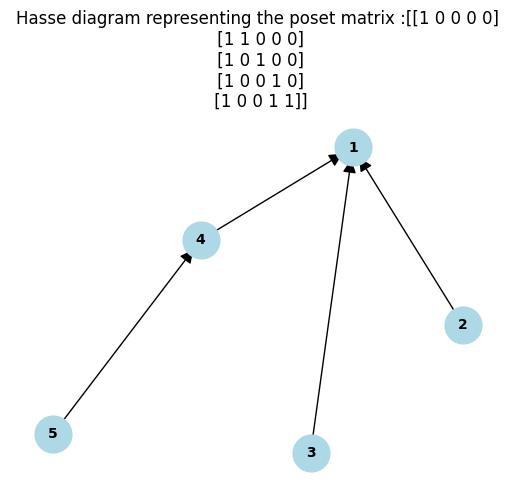

In [ ]:
# Generate the Hasse diagram for matrix1 to visualize the underlying poset structure
visualize_poset_from_triangular_matrix(matrix1)

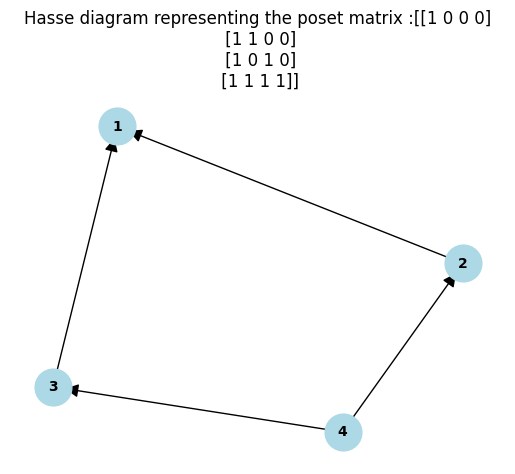

In [ ]:
# Generate the Hasse diagram for matrix2 to visualize the underlying poset structure
visualize_poset_from_triangular_matrix(matrix2)

In [ ]:
def get_maximal_elements(poset_matrix):
    """
    Identifies all maximal elements in the poset represented by the matrix.

    An element is maximal if no other element is greater than it. In a
    lower-triangular relation matrix (where matrix[i, j] = 1 if i <= j),
    maximal elements correspond to columns with exactly one entry (the diagonal).

    Args:
        poset_matrix (np.ndarray): A square binary matrix representing the poset.

    Returns:
        list: Indices of the maximal elements.

    Complexity:
        Time: O(n²) - Requires summing the entries of the matrix.
              Using NumPy's axis sum is significantly faster than a Python loop.
        Space: O(k) - Where k is the number of maximal elements returned in the list.
    """
    # Summing columns: a maximal element has no predecessors other than itself
    column_sums = poset_matrix.sum(axis=0)
    maximal_indices = np.where(column_sums == 1)[0].tolist()

    return maximal_indices


In [ ]:
# Identify the maximal elements (elements with no successors) in the poset
get_maximal_elements(matrix1)

[1, 2, 4]

In [ ]:
# Identify the maximal elements (elements with no successors) in the poset
get_maximal_elements(matrix2)

[3]

In [ ]:
def get_minimal_elements(poset_matrix):
    """
    Identifies all minimal elements in the poset represented by the matrix.

    An element is minimal if no other element is smaller than it. In a
    lower-triangular relation matrix (where matrix[i, j] = 1 if i <= j),
    minimal elements correspond to rows with exactly one entry (the diagonal).

    Args:
        poset_matrix (np.ndarray): A square binary matrix representing the poset.

    Returns:
        list: Indices of the minimal elements.

    Complexity:
        Time: O(n²) - Performs a single vectorized pass over the n x n matrix to
              calculate row sums.
        Space: O(k) - Where k is the number of minimal elements found.
    """
    # Summing rows: a minimal element has no predecessors other than itself
    # axis=1 calculates sums across each row
    row_sums = poset_matrix.sum(axis=1)
    minimal_indices = np.where(row_sums == 1)[0].tolist()

    return minimal_indices


In [ ]:
# Identify the minimal elements (the "bottom" or atoms) of the poset for matrix1
get_minimal_elements(matrix1)


[0]

In [ ]:
# A 6x6 lower triangular poset matrix with 4 minimal elements
matrix4 = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 1, 0],
    [0, 0, 1, 1, 0, 1]
])

In [ ]:
# Identify the minimal elements (the "bottom" or atoms) of the poset for matrix4
get_minimal_elements(matrix4)


[0, 1, 2, 3]

In [ ]:
def compute_operadic_submatrix_U(l_matrix, r_matrix, i):
    """
    Constructs the submatrix U for the partial composition (operad) of two poset matrices.

    The submatrix U represents the inherited relations between the inserted poset
    (r_matrix) and the elements preceding the insertion point (i) in the base
    poset (l_matrix). Relations from the i-th row of l_matrix are assigned
    specifically to the maximal elements of r_matrix.

    Args:
        l_matrix (np.ndarray): The 'left' n x n poset matrix.
        r_matrix (np.ndarray): The 'right' m x m poset matrix being inserted.
        i (int): The 1-based index (consistent with paper notation) for insertion.
                 Internal logic handles 0-based conversion.

    Returns:
        np.ndarray: An (m x i-1) binary matrix representing the U block.

    Complexity:
        Time: O(m²)
            Dominated by the calculation of maximal elements in r_matrix (O(m²)).
            The broadcast assignment to U is O(m * i).
        Space: O(m * i)
            To store the resulting submatrix U.
    """
    # Adjust for 0-based indexing if 'i' is provided as 1-based (per paper notation)
    row_idx = i - 1

    # Extract the row vector A(i) from the base matrix: A[i | 1...i-1]
    # This represents relations from i to everything before it
    base_relations = l_matrix[row_idx, :row_idx]

    m = r_matrix.shape[0]
    u_block = np.zeros((m, row_idx), dtype='int64')

    # Identify maximal elements of the inserted poset
    max_elements = get_maximal_elements(r_matrix)

    # Vectorized assignment: Assign the base relations to all maximal element rows
    if max_elements:
        u_block[max_elements] = base_relations

    return u_block


In [ ]:
# Construct submatrix U representing relations between maximal elements of matrix2 and elements {1,...,i-1} of matrix1
compute_operadic_submatrix_U(matrix1,matrix2,3)

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 0]])

In [ ]:
# Construct submatrix U representing relations between maximal elements of matrix2 and elements {1,...,i-1} of matrix1
compute_operadic_submatrix_U(matrix1,matrix2,3)

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 0]])

In [ ]:
def compute_operadic_submatrix_V(l_matrix, r_matrix, i):
    """
    Constructs the submatrix V for the partial composition (operad) of two poset matrices.

    The submatrix V represents the inherited relations between the elements following
    the insertion point (i) in the base poset (l_matrix) and the inserted poset
    (r_matrix). Relations from the i-th column of l_matrix are assigned
    specifically to the minimal elements of r_matrix.

    Args:
        l_matrix (np.ndarray): The 'left' n x n poset matrix.
        r_matrix (np.ndarray): The 'right' m x m poset matrix being inserted.
        i (int): The 1-based index (consistent with paper notation) for insertion.
                 Internal logic handles 0-based conversion.

    Returns:
        np.ndarray: An (n-i x m) binary matrix representing the V block.

    Complexity:
        Time: O(m²)
            Dominated by identifying minimal elements of r_matrix (O(m²)).
            The vectorized assignment to V is O((n-i) * m).
        Space: O((n-i) * m)
            To store the resulting submatrix V.
    """
    # Adjust for 0-based indexing (paper index i corresponds to array index i-1)
    # Elements following i start at array index i
    n = l_matrix.shape[0]
    m = r_matrix.shape[0]

    # Extract the column vector A^(i) from the base matrix: A[i+1...n | i]
    # This represents relations from i to everything after it
    base_relations_col = l_matrix[i:n, i-1]

    # Initialize the (n-i) x m block
    v_block = np.zeros((n - i, m), dtype='int64')

    # Identify minimal elements (atoms) of the inserted poset
    min_elements = get_minimal_elements(r_matrix)

    # Vectorized assignment: Assign the column relations to all minimal element columns
    if min_elements:
        v_block[:, min_elements] = base_relations_col[:, np.newaxis]

    return v_block


In [ ]:
# Construct submatrix V connecting minimal elements of matrix2 to elements {i+1,...,n} of matrix1
compute_operadic_submatrix_V(matrix1,matrix2,1)

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
# Construct submatrix V to link the minimal elements of matrix1 to the successors of index 2 in matrix2
compute_operadic_submatrix_V(matrix2,matrix1,2)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [ ]:
def flatten_poset_matrix(poset_matrix):
    """
    Converts a 2D poset matrix into a 1D array representation.

    This is typically used for serialization, facilitating comparisons between
    different poset structures, or preparing the data for combinatorial enumeration.

    Args:
        poset_matrix (np.ndarray): The n x n binary matrix to be flattened.

    Returns:
        np.ndarray: A 1D view or copy of the matrix elements in row-major order.

    Complexity:
        Time: O(n²)
            The function must visit all n*n elements to create the flattened array.
            In NumPy, this is highly optimized but scales with the total number of entries.
        Space: O(n²)
            Returns a new 1D array containing all elements of the original matrix.
    """
    return poset_matrix.flatten()


In [ ]:
def deserialize_to_matrix(flat_data):
    """
    Reconstructs a square n x n matrix from a 1D tuple or array.

    Args:
        flat_data (tuple or list): A sequence containing n² elements representing
                                   a flattened square matrix.

    Returns:
        np.ndarray: A 2D square NumPy array of shape (n, n).

    Raises:
        ValueError: If the input size is not a perfect square.

    Complexity:
        Time: O(n²)
            Creating a new NumPy array from a tuple requires copying all n² elements.
            The reshape operation itself is O(1) as it just changes metadata.
        Space: O(n²)
            Allocates a new n x n matrix in memory to store the elements.
    """
    n_squared = len(flat_data)
    side = int(math.sqrt(n_squared))

    if side * side != n_squared:
        raise ValueError(f"Input size {n_squared} is not a perfect square.")

    return np.array(flat_data).reshape(side, side)


In [ ]:
def deep_tuple_convert(item):
    """
    Recursively converts an iterable (like a list or NumPy array) and its
    nested elements into a collection of tuples.

    This ensures that multi-dimensional structures, such as poset matrices,
    become immutable and hashable, allowing them to be used as dictionary keys
    for frequency counts or uniqueness sets.

    Args:
        item (iterable): The nested structure (list, array, etc.) to convert.

    Returns:
        tuple: A nested tuple representation of the input.

    Complexity:
        Time: O(N)
            Where N is the total number of elements in the structure. Each
            element is visited once during the recursive traversal.
        Space: O(N)
            Creates a complete immutable copy of the original data in memory,
            plus the overhead of the recursion stack (depth of nesting).
    """
    try:
        return tuple(deep_tuple_convert(i) for i in item)
    except TypeError:
        # Not an iterable, return the item itself
        return item


In [ ]:
def filter_unique_posets(matrix_list):
    """
    Safely identifies and returns unique matrices from a collection.

    Args:
        matrix_list (list): A list of matrices (as np.ndarrays).

    Returns:
        list: Only unique np.ndarrays.
    """
    unique_tuples = set()
    unique_matrices = []

    for m in matrix_list:
        # Convert to numpy array if it's currently a list to ensure .flatten() exists
        m_arr = np.asanyarray(m)
        m_tuple = tuple(m_arr.flatten())

        if m_tuple not in unique_tuples:
            unique_tuples.add(m_tuple)
            unique_matrices.append(m_arr)

    return unique_matrices


In [ ]:
# A collection of 3x3 poset matrices containing duplicate entries for testing deduplication algorithms
sample_poset_collection = [
    np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),
    np.array([[1, 0, 0], [1, 1, 0], [1, 0, 1]]),
    np.array([[1, 0, 0], [1, 1, 0], [0, 0, 1]]),
    np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]),  # Duplicate of index 0
    np.array([[1, 0, 0], [1, 1, 0], [1, 1, 1]]),
    np.array([[1, 0, 0], [1, 1, 0], [1, 0, 1]])   # Duplicate of index 1
]


In [ ]:
# Remove duplicate entries from the collection to identify the set of distinct poset structures
filter_unique_posets(sample_poset_collection)

[array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [1, 0, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [0, 0, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [1, 1, 1]])]

In [ ]:
def flatten_nested_results(nested_list):
    """
    Flattens a two-tier nested list into a single-dimensional list.

    Commonly used to consolidate lists of poset matrices generated across
    different iterations or sub-processes into a single collection for analysis.

    Args:
        nested_list (list): A list containing sub-lists of elements.

    Returns:
        list: A single continuous list containing all elements from the sub-lists.

    Complexity:
        Time: O(N)
            Where N is the total number of elements across all sub-lists. The
            function visits each element exactly once to append it to the result.
        Space: O(N)
            Allocates a new list to store all N elements.
    """
    # More idiomatic and faster way to flatten a nested list in Python
    return [item for sublist in nested_list for item in sublist]


In [ ]:
# Multi-level nested list containing batches of 3x3 poset matrices generated from
# different composition branches, used for testing list consolidation and deduplication.
batched_composition_results = [[[np.array([[1, 0, 0],
          [0, 1, 0],
          [0, 0, 1]]),
   np.array([[1, 0, 0],
          [0, 1, 0],
          [0, 0, 1]])],
  [np.array([[1, 0, 0],
          [0, 1, 0],
          [1, 1, 1]]),
   np.array([[1, 0, 0],
          [1, 1, 0],
          [1, 0, 1]])]],
 [[np.array([[1, 0, 0],
          [1, 1, 0],
          [0, 0, 1]]),
   np.array([[1, 0, 0],
          [0, 1, 0],
          [0, 1, 1]])],
  [np.array([[1, 0, 0],
          [1, 1, 0],
          [1, 1, 1]]),
   np.array([[1, 0, 0],
          [1, 1, 0],
          [1, 1, 1]])]]]


In [ ]:
# Reduce the batch-nested structure into a single collection of poset matrices for analysis
flatten_nested_results(batched_composition_results)

[[array([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]]),
  array([[1, 0, 0],
         [0, 1, 0],
         [0, 0, 1]])],
 [array([[1, 0, 0],
         [0, 1, 0],
         [1, 1, 1]]),
  array([[1, 0, 0],
         [1, 1, 0],
         [1, 0, 1]])],
 [array([[1, 0, 0],
         [1, 1, 0],
         [0, 0, 1]]),
  array([[1, 0, 0],
         [0, 1, 0],
         [0, 1, 1]])],
 [array([[1, 0, 0],
         [1, 1, 0],
         [1, 1, 1]]),
  array([[1, 0, 0],
         [1, 1, 0],
         [1, 1, 1]])]]

In [ ]:
# --- Initialization of matrices for partial composition operations ---

# Matrices representing the right-hand argument (B) in the composition (A ∘_i B)
right_side_matrices = [
    np.array([[1, 0], [0, 1]]), # Antichain (dis_connected_poset)
    np.array([[1, 0], [1, 1]])  # Chain (connected)
]

# Matrices representing the left-hand base (A) in the composition (A ∘_i B)
left_side_matrices = right_side_matrices

# Subset of left-side matrices specifically representing dis_connected_poset poset structures
left_matrices_dis_connected_poset = [left_side_matrices[0]]

# Subset of left-side matrices specifically representing connected poset structures
left_matrices_connected = [left_side_matrices[1]]

# Displaying initialized counts to verify setup
print(f"Total Left Matrices: {len(left_side_matrices)}")
print(f"Connected: {len(left_matrices_connected)} | Dis_connected_poset: {len(left_matrices_dis_connected_poset)}")


Total Left Matrices: 2
Connected: 1 | Dis_connected_poset: 1


In [ ]:
def enumerate_operadic_posets(
    base_matrices=left_side_matrices,
    insertion_matrices=right_side_matrices,
    composition_func=None,
    predicate_func=None,
    return_matrices=False,
    iterations=1
):
    """
    Iteratively generates and counts unique poset matrices.
    Updated to handle composition functions that return lists of matrices.
    """
    counts = []
    predicate_true, predicate_false = [], []
    collected_matrices = []

    current_bases = base_matrices

    for _ in range(iterations):
        batch_results = []

        for r_mat in insertion_matrices:
            for l_mat in current_bases:
                # The composition functions (Theorems 2.2, 2.6, etc.)
                # return a LIST of matrices. We must extend batch_results, not append.
                new_matrices = composition_func(l_mat, r_mat)
                batch_results.extend(new_matrices)

        # Deduplicate the full list of generated matrices
        current_bases = filter_unique_posets(batch_results)

        counts.append(len(current_bases))

        if predicate_func:
            results = [predicate_func(m) for m in current_bases]
            predicate_true.append(results.count(True))
            predicate_false.append(results.count(False))
            if return_matrices:
                collected_matrices.append(list(zip(current_bases, results)))
        else:
            if return_matrices:
                collected_matrices.append(current_bases)

    return counts, collected_matrices, predicate_true, predicate_false


In [ ]:
def generate_operadic_compositions(l_matrix, r_matrix):
    """
    Computes all partial compositions A ∘_i B of two poset matrices A and B
    according to Theorem 2.2 in [arXiv:2401.06814].

    For a base matrix A (p x p) and insertion matrix B (q x q), this function
    generates a list of p matrices, each of size (p+q-1) x (p+q-1), by
    systematically substituting each element i of A with the entire matrix B.

    Args:
        l_matrix (np.ndarray): The 'left' p x p poset matrix (A).
        r_matrix (np.ndarray): The 'right' q x q poset matrix (B) to be inserted.

    Returns:
        list[np.ndarray]: A list of p resulting poset matrices of size (p+q-1).

    Complexity:
        Time: O(p * (p+q)²)
              The function iterates p times (insertion points). In each iteration,
              it constructs a new matrix of size (p+q-1)². The concatenation and
              tensordot operations scale quadratically with the total dimension.
        Space: O(p * (p+q)²)
               Returns a list containing p matrices of the combined dimensions.
    """
    p = l_matrix.shape[0]
    q = r_matrix.shape[0]
    output_list = []

    # Iterate through each possible insertion point i (1 to p)
    for i in range(1, p + 1):
        # 1-based index i maps to 0-based index i-1
        idx = i - 1

        # Extract components of A based on Theorem 2.2 partitioning
        A11 = l_matrix[:idx, :idx]
        A21 = l_matrix[i:, i:]   # Submatrix following i
        A22 = l_matrix[i:, :idx]  # Block below A11

        row_Ai = l_matrix[idx, :idx]
        col_Ai = l_matrix[i:, idx]

        # Construct U_i and V_i (Relation propagation blocks)
        # Using broadcasting via np.outer for better performance than tensordot
        Ui = np.outer(np.ones(q, dtype='int64'), row_Ai)
        Vi = np.outer(col_Ai, np.ones(q, dtype='int64'))

        # Construct zero blocks for padding
        Y1 = np.zeros((idx, q + p - i), dtype='int64')
        Y2 = np.zeros((q, p - i), dtype='int64')

        # Assemble the (p+q-1) x (p+q-1) matrix in three horizontal blocks
        block1 = np.concatenate((A11, Y1), axis=1)
        block2 = np.concatenate((Ui, r_matrix, Y2), axis=1)
        block3 = np.concatenate((A22, Vi, A21), axis=1)

        full_composed_matrix = np.concatenate((block1, block2, block3), axis=0)
        output_list.append(full_composed_matrix)

    return output_list


In [ ]:
# Compute all partial compositions matrix2 ∘ᵢ B, where B is the connected 2x2 poset matrix
generate_operadic_compositions(matrix2,right_side_matrices [1])

[array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 0, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1]])]

In [ ]:
def generate_minimal_operadic_compositions(l_matrix, r_matrix):
    """
    Computes partial compositions A ∘_i B of two poset matrices based on
    Theorem 2.6 in [arXiv:2401.06814].

    Unlike the general construction, this version utilizes the minimal elements
    of the inserted poset (B) to refine the inheritance of relations from the
    base poset (A), specifically for elements following the insertion point i.

    Args:
        l_matrix (np.ndarray): The 'left' p x p base poset matrix (A).
        r_matrix (np.ndarray): The 'right' q x q insertion poset matrix (B).

    Returns:
        list[np.ndarray]: A list of p resulting poset matrices of size (p+q-1).

    Complexity:
        Time: O(p * (q² + (p+q)²))
              Iterates p times. In each loop, it identifies minimal elements
              (O(q²)) and performs matrix concatenations (O((p+q)²)).
        Space: O(p * (p+q)²)
               Stores p generated matrices of the combined dimensions.
    """
    p = l_matrix.shape[0]
    q = r_matrix.shape[0]
    output_list = []

    for i in range(1, p + 1):
        idx = i - 1

        # Partitioning base matrix A components
        A11 = l_matrix[:idx, :idx]
        A21 = l_matrix[i:, i:]
        A22 = l_matrix[i:, :idx]

        # Padding blocks
        y1 = np.zeros((idx, p + q - i), dtype='int64')
        y2 = np.zeros((q, p - i), dtype='int64')

        # Construct U_i: Relations between i and elements {1...i-1}
        row_Ai = l_matrix[idx, :idx]
        # Broadcasting the row to all rows of the inserted matrix
        Ui = np.tile(row_Ai, (q, 1))

        # Construct V_i: Using the minimal elements of r_matrix (Theorem 2.6)
        v = compute_operadic_submatrix_V(l_matrix, r_matrix, i)

        # Horizontal block assembly
        block1 = np.concatenate((A11, y1), axis=1)
        block2 = np.concatenate((Ui, r_matrix, y2), axis=1)
        block3 = np.concatenate((A22, v, A21), axis=1)

        # Final vertical assembly
        output = np.concatenate((block1, block2, block3), axis=0)
        output_list.append(output)

    return output_list


In [ ]:
# Apply the refined composition matrix2 ∘ᵢ B (Theorem 2.6) using the minimal elements of the connected 2x2 poset
generate_minimal_operadic_compositions(matrix2,right_side_matrices [1])

[array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 0, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 0, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 0, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1]])]

In [ ]:
def generate_maximal_operadic_compositions(l_matrix, r_matrix):
    """
    Computes partial compositions A ∘_i B of two poset matrices based on
    Theorem 2.7 in [arXiv:2401.06814].

    This construction utilizes the maximal elements of the inserted poset (B)
    to refine how relations from the base poset (A) are inherited by B from
    elements preceding the insertion point i.

    Args:
        l_matrix (np.ndarray): The 'left' p x p base poset matrix (A).
        r_matrix (np.ndarray): The 'right' q x q insertion poset matrix (B).

    Returns:
        list[np.ndarray]: A list of p resulting poset matrices of size (p+q-1).

    Complexity:
        Time: O(p * (q² + (p+q)²))
              Iterates p times. In each iteration, it identifies maximal elements
              (O(q²)) and performs matrix concatenations (O((p+q)²)).
        Space: O(p * (p+q)²)
               Allocates and returns p matrices of the combined dimensions.
    """
    p = l_matrix.shape[0]
    q = r_matrix.shape[0]
    output_list = []

    for i in range(1, p + 1):
        idx = i - 1

        # Partitioning base matrix A components
        A11 = l_matrix[:idx, :idx]
        A21 = l_matrix[i:, i:]
        A22 = l_matrix[i:, :idx]

        # Padding blocks
        y1 = np.zeros((idx, p + q - i), dtype='int64')
        y2 = np.zeros((q, p - i), dtype='int64')

        # Construct U_i: Using the maximal elements of r_matrix (Theorem 2.7)
        U = compute_operadic_submatrix_U(l_matrix, r_matrix, i)

        # Construct V_i: Relations between i and elements {i+1...p}
        col_Ai = l_matrix[i:, idx]
        # Broadcasting the column to all columns of the inserted matrix
        Vi = np.tile(col_Ai[:, np.newaxis], (1, q))

        # Horizontal block assembly
        block1 = np.concatenate((A11, y1), axis=1)
        block2 = np.concatenate((U, r_matrix, y2), axis=1)
        block3 = np.concatenate((A22, Vi, A21), axis=1)

        # Final vertical assembly
        output = np.concatenate((block1, block2, block3), axis=0)
        output_list.append(output)

    return output_list


In [ ]:
# Apply the refined composition matrix2 ∘ᵢ B (Theorem 2.7) using the maximal elements of the connected 2x2 poset
generate_maximal_operadic_compositions(matrix2,right_side_matrices [1])

[array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 0, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1]])]

In [ ]:
def generate_boundary_operadic_compositions(l_matrix, r_matrix):
    """
    Computes partial compositions A ∘_i B of two poset matrices based on
    Theorem 2.8 in [arXiv:2401.06814].

    This function implements the boundary-restricted propagation rule:
    relations from the base poset A are inherited by the inserted poset B
    exclusively through B's maximal elements (for predecessors) and
    minimal elements (for successors).

    Args:
        l_matrix (np.ndarray): The 'left' p x p base poset matrix (A).
        r_matrix (np.ndarray): The 'right' q x q insertion poset matrix (B).

    Returns:
        list[np.ndarray]: A list of p resulting poset matrices of size (p+q-1).

    Complexity:
        Time: O(p * (q² + (p+q)²))
              Iterates p times. Each step identifies both maximal and minimal
              elements of B (O(q²)) and assembles the results (O((p+q)²)).
        Space: O(p * (p+q)²)
               Stores p generated matrices of the combined dimensions.
    """
    p = l_matrix.shape[0]
    q = r_matrix.shape[0]
    output_list = []

    for i in range(1, p + 1):
        idx = i - 1

        # Partitioning base matrix A components
        A11 = l_matrix[:idx, :idx]
        A21 = l_matrix[i:, i:]
        A22 = l_matrix[i:, :idx]

        # Padding blocks
        y1 = np.zeros((idx, p + q - i), dtype='int64')
        y2 = np.zeros((q, p - i), dtype='int64')

        # Construct Boundary Propagation Blocks (Theorem 2.8)
        U = compute_operadic_submatrix_U(l_matrix, r_matrix, i)
        V = compute_operadic_submatrix_V(l_matrix, r_matrix, i)

        # Horizontal block assembly
        block1 = np.concatenate((A11, y1), axis=1)
        block2 = np.concatenate((U, r_matrix, y2), axis=1)
        block3 = np.concatenate((A22, V, A21), axis=1)

        # Final vertical assembly
        output = np.concatenate((block1, block2, block3), axis=0)
        output_list.append(output)

    return output_list


In [ ]:
# Apply Theorem 2.8 to compute partial compositions restricted to both minimal and maximal elements of the connected 2x2 poset
generate_boundary_operadic_compositions(matrix2,right_side_matrices [1])

[array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 0, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 0, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 0, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1]])]

In [ ]:
# Iteratively generate the species of poset matrices up to size 10x10 using the general partial composition (Theorem 2.2)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)


([6, 22, 90, 394, 1806, 8558, 41586, 206098], [], [], [])

In [ ]:
# Generate and store unique poset matrices for the first 3 generations of the operad species (Theorem 2.2)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=str(),return_matrices=True,iterations=3)

([6, 22, 90],
 [[array([[1, 0, 0],
          [0, 1, 0],
          [0, 0, 1]]),
   array([[1, 0, 0],
          [0, 1, 0],
          [1, 1, 1]]),
   array([[1, 0, 0],
          [1, 1, 0],
          [1, 0, 1]]),
   array([[1, 0, 0],
          [1, 1, 0],
          [0, 0, 1]]),
   array([[1, 0, 0],
          [0, 1, 0],
          [0, 1, 1]]),
   array([[1, 0, 0],
          [1, 1, 0],
          [1, 1, 1]])],
  [array([[1, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]),
   array([[1, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 0, 1, 0],
          [1, 1, 1, 1]]),
   array([[1, 0, 0, 0],
          [0, 1, 0, 0],
          [1, 1, 1, 0],
          [1, 1, 0, 1]]),
   array([[1, 0, 0, 0],
          [1, 1, 0, 0],
          [1, 0, 1, 0],
          [1, 0, 0, 1]]),
   array([[1, 0, 0, 0],
          [0, 1, 0, 0],
          [1, 1, 1, 0],
          [0, 0, 0, 1]]),
   array([[1, 0, 0, 0],
          [1, 1, 0, 0],
          [1, 0, 1, 0],
          [0, 0, 0, 1]]),
   arra

In [ ]:
# Enumerate unique posets up to size 10x10, starting from the connected species subset using Theorem 2.2
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049], [], [], [])

In [ ]:
# Iteratively enumerate the species of poset matrices using the minimal-restricted partial composition (Theorem 2.6)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_minimal_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098], [], [], [])

In [ ]:
# Enumerate unique posets up to size 10x10, applying the minimal-restricted composition (Theorem 2.6) to connected base structures
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_minimal_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049], [], [], [])

In [ ]:
# Iteratively enumerate the species of poset matrices using the maximal-restricted partial composition (Theorem 2.7)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_maximal_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098], [], [], [])

In [ ]:
# Enumerate unique posets up to size 10x10, applying the maximal-restricted composition (Theorem 2.7) to connected base structures
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_maximal_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049], [], [], [])

In [ ]:
#Enumerate unique poset structures using boundary-restricted propagation (Theorem 2.8)
# over 8 iterations to observe the species growth under minimal/maximal constraints
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)


([5, 15, 52, 201, 841, 3726, 17213, 82047], [], [], [])

In [ ]:
# Enumerate unique posets up to size 10x10 by applying boundary-restricted composition (Theorem 2.8) to connected base structures
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)


([2, 6, 22, 90, 394, 1806, 8558, 41586], [], [], [])

In [ ]:
# Enumerate unique posets up to size 10x10, applying boundary-restricted composition (Theorem 2.8) to dis_connected_poset base structures
enumerate_operadic_posets(base_matrices=left_matrices_dis_connected_poset,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)


([3, 9, 30, 111, 447, 1920, 8655, 40461], [], [], [])

In [ ]:
def compute_dual_poset_matrix(posetmatrix):

  dimPoset=posetmatrix.shape[0]
  dualmatrix = np.zeros((dimPoset,dimPoset),int)

  for s in range(dimPoset):
     for r in range(dimPoset):
        dualmatrix[s,r]=posetmatrix[dimPoset-r-1,dimPoset-s-1]

  return dualmatrix

In [ ]:
def compute_dual_poset_matrix(poset_matrix):
    """
    Computes the dual poset matrix by reversing all partial order relations.

    Mathematically, this corresponds to the operation where i ≤ j in the dual
    poset if and only if j ≤ i in the original poset. Structurally, this is
    equivalent to reflecting the matrix across its anti-diagonal.

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        np.ndarray: The n x n dual poset matrix.

    Complexity:
        Time: O(n²)
            The function visits every element to perform the reflection. Using
            NumPy's built-in flip/transpose is O(n²) but runs in optimized C.
        Space: O(n²)
            Allocates a new matrix to store the dual structure.
    """
    # Optimized NumPy approach: flip both axes and transpose
    # This is equivalent to your s, r indexing logic
    return np.flip(poset_matrix).T


In [ ]:
matrix1

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1]])

In [ ]:
# Compute the dual poset matrix by reversing the partial order relations of matrix1
compute_dual_poset_matrix(matrix1)

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1]])

In [ ]:
def is_not_self_dual(poset_matrix):
    """
    Determines if a poset is NOT self-dual by comparing it with its dual matrix.

    A poset is self-dual if it is isomorphic to its dual (the order-reversal).
    This function specifically checks for strict matrix equality between the
    original and the dual representation.

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        bool: False if the matrix is identical to its dual (self-dual),
              True otherwise.

    Complexity:
        Time: O(n²)
              Requires computing the dual matrix (O(n²)) and performing a
              full-matrix comparison (O(n²)).
        Space: O(n²)
               Allocates memory for the intermediate dual matrix during comparison.
    """
    # Using np.array_equal is slightly more efficient than allclose for binary matrices
    dual = compute_dual_poset_matrix(poset_matrix)
    return not np.array_equal(dual, poset_matrix)


In [ ]:
# Evaluate if matrix1 lacks self-duality (i.e., it is not identical to its order-reversal)
is_not_self_dual(matrix1)

True

In [ ]:
identity_matrix=np.array([[1,0,0],[0,1,0],[0,0,1]])

In [ ]:
# Evaluate the self-duality of the identity matrix (representing a discrete antichain)
is_not_self_dual(identity_matrix)

False

In [ ]:
unit_matrix=np.array([[1]])

In [ ]:
# Compute the dual of the unit matrix to verify the order-reversal of a linear chain
compute_dual_poset_matrix(unit_matrix)

array([[1]])

In [ ]:
# Enumerate unique posets and classify them by self-duality status over 2 generations of Theorem 2.2
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=
                          generate_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=True,iterations=2)

([6, 22],
 [[(array([[1, 0, 0],
           [0, 1, 0],
           [0, 0, 1]]),
    False),
   (array([[1, 0, 0],
           [0, 1, 0],
           [1, 1, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [1, 0, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [0, 0, 1]]),
    True),
   (array([[1, 0, 0],
           [0, 1, 0],
           [0, 1, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [1, 1, 1]]),
    False)],
  [(array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 0, 1, 0],
           [0, 0, 0, 1]]),
    False),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 0, 1, 0],
           [1, 1, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 1, 0, 1]]),
    False),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 0, 1, 0],
           [1, 0, 0, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
         

In [ ]:
# Quantify the presence of non-self-dual poset structures over 8 generations of operadic composition (Theorem 2.2)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,
composition_func=generate_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [4, 16, 84, 372, 1784, 8468, 41496, 205704],
 [2, 6, 6, 22, 22, 90, 90, 394])

In [ ]:
# Analyze the distribution of self-duality within the connected species across 8 generations of Theorem 2.2
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [2, 8, 42, 186, 892, 4234, 20748, 102852],
 [1, 3, 3, 11, 11, 45, 45, 197])

In [ ]:
# Analyze the distribution of self-duality within the species generated by minimal-restricted composition (Theorem 2.6) over 8 iterations
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_minimal_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [4, 15, 84, 372, 1788, 8493, 41533, 205909],
 [2, 7, 6, 22, 18, 65, 53, 189])

In [ ]:
# Analyze the distribution of self-duality in connected posets over 8 generations of minimal-restricted composition (Theorem 2.6)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_minimal_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [2, 7, 42, 187, 896, 4257, 20778, 103003],
 [1, 4, 3, 10, 7, 22, 15, 46])

In [ ]:
# Analyze the distribution of self-duality across 8 generations of the species generated via maximal-restricted composition (Theorem 2.7)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_maximal_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [4, 15, 84, 372, 1788, 8493, 41533, 205909],
 [2, 7, 6, 22, 18, 65, 53, 189])

In [ ]:
# Analyze the distribution of self-duality in connected posets over 8 generations of maximal-restricted composition (Theorem 2.7)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_maximal_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [2, 7, 42, 187, 896, 4257, 20778, 103003],
 [1, 4, 3, 10, 7, 22, 15, 46])

In [ ]:
# Analyze the distribution of self-duality within the species generated by boundary-restricted composition (Theorem 2.8) over 8 iterations
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=False,iterations=8)

([5, 15, 52, 201, 841, 3726, 17213, 82047],
 [],
 [4, 10, 50, 186, 836, 3674, 17198, 81846],
 [1, 5, 2, 15, 5, 52, 15, 201])

In [ ]:
# Analyze the distribution of self-duality in connected posets over 8 generations of boundary-restricted composition (Theorem 2.8)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=False,iterations=8)

([2, 6, 22, 90, 394, 1806, 8558, 41586],
 [],
 [2, 4, 22, 84, 394, 1784, 8558, 41496],
 [0, 2, 0, 6, 0, 22, 0, 90])

In [ ]:
# Analyze the distribution of self-duality within the dis_connected_poset species over 8 generations of boundary-restricted composition (Theorem 2.8)
enumerate_operadic_posets(base_matrices=left_matrices_dis_connected_poset,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=is_not_self_dual,return_matrices=False,iterations=8)

([3, 9, 30, 111, 447, 1920, 8655, 40461],
 [],
 [2, 6, 28, 102, 442, 1890, 8640, 40350],
 [1, 3, 2, 9, 5, 30, 15, 111])

In [ ]:
def generate_total_operadic_compositions(l_matrix, r_matrix):
    """
    Computes all partial compositions A ∘_i B of two poset matrices based on
    Theorem 2.1(a) in [arXiv:2401.06814].

    In this "total" propagation model, the insertion of poset B into A at index i
    assumes maximal relations: every element in B inherits relations to all
    predecessors of i and from all successors of i in A.

    Args:
        l_matrix (np.ndarray): The 'left' p x p base poset matrix (A).
        r_matrix (np.ndarray): The 'right' q x q insertion poset matrix (B).

    Returns:
        list[np.ndarray]: A list of p resulting poset matrices of size (p+q-1).

    Complexity:
        Time: O(p * (p+q)²)
              Iterates p times (for each insertion point). Each iteration involves
              constructing a matrix of size (p+q-1)² via concatenations.
        Space: O(p * (p+q)²)
               Allocates and returns a list of p matrices of the combined dimensions.
    """
    p = l_matrix.shape[0]
    q = r_matrix.shape[0]
    output_list = []

    for i in range(1, p + 1):
        idx = i - 1

        # Partitioning base matrix A components according to Theorem 2.1
        A11 = l_matrix[:idx, :idx]
        A21 = l_matrix[i:, i:]
        A22 = l_matrix[i:, :idx]

        # Padding blocks (Zeros)
        y1 = np.zeros((idx, p + q - i), dtype='int64')
        y2 = np.zeros((q, p - i), dtype='int64')

        # Total Propagation Blocks (Ones) as per Theorem 2.1(a)
        Ui = np.ones((q, idx), dtype='int64')
        Vi = np.ones((p - i, q), dtype='int64')

        # Horizontal block assembly
        block1 = np.concatenate((A11, y1), axis=1)
        block2 = np.concatenate((Ui, r_matrix, y2), axis=1)
        block3 = np.concatenate((A22, Vi, A21), axis=1)

        # Final vertical assembly into the (p+q-1) square matrix
        output = np.concatenate((block1, block2, block3), axis=0)
        output_list.append(output)

    return output_list


In [ ]:
# Enumerate unique posets up to rank 15 using total-propagation composition (Theorem 2.1a) starting from connected base structures
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_total_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=15)

([3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584],
 [],
 [],
 [])

In [ ]:
def generate_isolated_operadic_compositions(l_matrix, r_matrix):
    """
    Computes all partial compositions A ∘_i B of two poset matrices based on
    Theorem 2.1(b) in [arXiv:2401.06814].

    In this "isolated" model, the inserted poset B inherits no relations from
    predecessors or to successors of the insertion point i. However, maximal
    relations are created between all elements preceding i and all elements
    following i (block A22 becomes a matrix of ones).

    Args:
        l_matrix (np.ndarray): The 'left' p x p base poset matrix (A).
        r_matrix (np.ndarray): The 'right' q x q insertion poset matrix (B).

    Returns:
        list[np.ndarray]: A list of p resulting poset matrices of size (p+q-1).

    Complexity:
        Time: O(p * (p+q)²)
              Iterates p times, constructing a square matrix of size (p+q-1)
              via NumPy concatenations in each iteration.
        Space: O(p * (p+q)²)
               Returns a list containing p matrices of the expanded dimensions.
    """
    p = l_matrix.shape[0]
    q = r_matrix.shape[0]
    output_list = []

    for i in range(1, p + 1):
        idx = i - 1

        # Base matrix A components
        A11 = l_matrix[:idx, :idx]
        A21 = l_matrix[i:, i:]

        # Theorem 2.1(b) Specifics:
        # A22 becomes all ones, while Ui and Vi become all zeroes.
        A22_ones = np.ones((p - i, idx), dtype='int64')
        Ui_zeros = np.zeros((q, idx), dtype='int64')
        Vi_zeros = np.zeros((p - i, q), dtype='int64')

        # Zero padding blocks
        y1 = np.zeros((idx, p + q - i), dtype='int64')
        y2 = np.zeros((q, p - i), dtype='int64')

        # Assembly
        block1 = np.concatenate((A11, y1), axis=1)
        block2 = np.concatenate((Ui_zeros, r_matrix, y2), axis=1)
        block3 = np.concatenate((A22_ones, Vi_zeros, A21), axis=1)

        full_composed_matrix = np.concatenate((block1, block2, block3), axis=0)
        output_list.append(full_composed_matrix)

    return output_list


In [ ]:
# Enumerate unique posets up to size 10x10 using isolated-insertion composition (Theorem 2.1b) starting from connected base structures
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_isolated_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=8)

([3, 6, 16, 40, 112, 314, 900, 2634], [], [], [])

In [ ]:
def generate_predecessor_dominant_compositions(l_matrix, r_matrix):
    """
    Computes all partial compositions A ∘_i B of two poset matrices based on
    Theorem 2.1(c) in [arXiv:2401.06814].

    In this model, the inserted poset B inherits relations from all elements
    preceding the insertion point i (Ui is saturated with ones), but no
    relations are passed to the elements following i (Vi remains zeros).
    Additionally, all predecessors of i are set to relate to all successors
    of i (A22 becomes all ones).

    Args:
        l_matrix (np.ndarray): The 'left' p x p base poset matrix (A).
        r_matrix (np.ndarray): The 'right' q x q insertion poset matrix (B).

    Returns:
        list[np.ndarray]: A list of p resulting poset matrices of size (p+q-1).

    Complexity:
        Time: O(p * (p+q)²)
              Iterates p times, performing matrix concatenations that scale
              with the square of the total number of elements.
        Space: O(p * (p+q)²)
               Returns a list of p matrices of the combined dimensions.
    """
    p = l_matrix.shape[0]
    q = r_matrix.shape[0]
    output_list = []

    for i in range(1, p + 1):
        idx = i - 1

        # Base matrix A components
        A11 = l_matrix[:idx, :idx]
        A21 = l_matrix[i:, i:]

        # Theorem 2.1(c) Specifics:
        # A22 and Ui become all ones, while Vi and padding remain zeroes.
        A22_ones = np.ones((p - i, idx), dtype='int64')
        Ui_ones = np.ones((q, idx), dtype='int64')
        Vi_zeros = np.zeros((p - i, q), dtype='int64')

        # Zero padding blocks
        y1 = np.zeros((idx, p + q - i), dtype='int64')
        y2 = np.zeros((q, p - i), dtype='int64')

        # Assembly
        block1 = np.concatenate((A11, y1), axis=1)
        block2 = np.concatenate((Ui_ones, r_matrix, y2), axis=1)
        block3 = np.concatenate((A22_ones, Vi_zeros, A21), axis=1)

        full_composed_matrix = np.concatenate((block1, block2, block3), axis=0)
        output_list.append(full_composed_matrix)

    return output_list


In [ ]:
# Enumerate unique posets up to size 10x10 using predecessor-dominant composition (Theorem 2.1c) starting from connected base structures
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_predecessor_dominant_compositions,predicate_func=str(),return_matrices=False,iterations=8)

([4, 10, 28, 80, 244, 774, 2524, 8414], [], [], [])

In [ ]:
def generate_successor_dominant_compositions(l_matrix, r_matrix):
    """
    Computes all partial compositions A ∘_i B of two poset matrices based on
    Theorem 2.1(d) in [arXiv:2401.06814].

    In this successor-dominant model, the inserted poset B inherits no relations
    from predecessors of the insertion point i (Ui remains zeros), but every
    element of B is set to relate to every successor of i in A (Vi is saturated
    with ones). Additionally, all original predecessors of i are set to relate
    to all successors of i (A22 becomes all ones).

    Args:
        l_matrix (np.ndarray): The 'left' p x p base poset matrix (A).
        r_matrix (np.ndarray): The 'right' q x q insertion poset matrix (B).

    Returns:
        list[np.ndarray]: A list of p resulting poset matrices of size (p+q-1).

    Complexity:
        Time: O(p * (p+q)²)
              Iterates p times, performing matrix concatenations that scale
              with the square of the total dimension (p+q).
        Space: O(p * (p+q)²)
               Returns a list of p matrices of the combined dimensions.
    """
    p = l_matrix.shape[0]
    q = r_matrix.shape[0]
    output_list = []

    for i in range(1, p + 1):
        idx = i - 1

        # Base matrix A components
        A11 = l_matrix[:idx, :idx]
        A21 = l_matrix[i:, i:]

        # Theorem 2.1(d) Specifics:
        # A22 and Vi become all ones, while Ui and padding remain zeroes.
        A22_ones = np.ones((p - i, idx), dtype='int64')
        Ui_zeros = np.zeros((q, idx), dtype='int64')
        Vi_ones = np.ones((p - i, q), dtype='int64')

        # Zero padding blocks
        y1 = np.zeros((idx, p + q - i), dtype='int64')
        y2 = np.zeros((q, p - i), dtype='int64')

        # Assembly of horizontal blocks
        block1 = np.concatenate((A11, y1), axis=1)
        block2 = np.concatenate((Ui_zeros, r_matrix, y2), axis=1)
        block3 = np.concatenate((A22_ones, Vi_ones, A21), axis=1)

        # Vertical assembly into final matrix
        full_composed_matrix = np.concatenate((block1, block2, block3), axis=0)
        output_list.append(full_composed_matrix)

    return output_list


In [ ]:
# Enumerate unique posets up to size 10x10 using successor-dominant composition (Theorem 2.1d) starting from connected base structures
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_successor_dominant_compositions,predicate_func=str(),return_matrices=False,iterations=8)

([4, 10, 28, 80, 244, 774, 2524, 8414], [], [], [])

In [ ]:
def generate_fully_isolated_operadic_compositions(l_matrix, r_matrix):
    """
    Computes all partial compositions A ∘_i B of two poset matrices based on
    Theorem 2.1(e) in [arXiv:2401.06814].

    In this "null propagation" model, the inserted poset B is completely isolated.
    It inherits no relations from predecessors (Ui=0) and propagates none to
    successors (Vi=0). Furthermore, any existing relations between predecessors
    and successors of the insertion point i are removed (A22=0).

    Args:
        l_matrix (np.ndarray): The 'left' p x p base poset matrix (A).
        r_matrix (np.ndarray): The 'right' q x q insertion poset matrix (B).

    Returns:
        list[np.ndarray]: A list of p resulting poset matrices of size (p+q-1).

    Complexity:
        Time: O(p * (p+q)²)
              Iterates p times, performing matrix concatenations that scale
              with the square of the total number of elements.
        Space: O(p * (p+q)²)
               Returns a list of p matrices of the combined dimensions.
    """
    p = l_matrix.shape[0]
    q = r_matrix.shape[0]
    output_list = []

    for i in range(1, p + 1):
        idx = i - 1

        # Partitioning base matrix A components
        A11 = l_matrix[:idx, :idx]
        A21 = l_matrix[i:, i:]

        # Theorem 2.1(e) Specifics:
        # A22, Ui, Vi, and padding all become matrices of zeros.
        A22_zeros = np.zeros((p - i, idx), dtype='int64')
        Ui_zeros = np.zeros((q, idx), dtype='int64')
        Vi_zeros = np.zeros((p - i, q), dtype='int64')

        # Zero padding blocks for structural alignment
        y1 = np.zeros((idx, p + q - i), dtype='int64')
        y2 = np.zeros((q, p - i), dtype='int64')

        # Assembly of horizontal blocks
        block1 = np.concatenate((A11, y1), axis=1)
        block2 = np.concatenate((Ui_zeros, r_matrix, y2), axis=1)
        block3 = np.concatenate((A22_zeros, Vi_zeros, A21), axis=1)

        # Vertical assembly into final matrix
        full_composed_matrix = np.concatenate((block1, block2, block3), axis=0)
        output_list.append(full_composed_matrix)

    return output_list


In [ ]:
# Enumerate unique posets up to rank 14 using fully-isolated composition (Theorem 2.1e) starting from connected base structures
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_fully_isolated_operadic_compositions,predicate_func=str(),return_matrices=False,iterations=14)

([3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597], [], [], [])

In [ ]:
def is_trivial_poset(poset_matrix):
    """
    Checks if the given matrix represents the trivial (rank 1) poset.

    A trivial poset matrix in this context is defined as a 1x1 matrix
    where the single element is equal to 1.

    Args:
        poset_matrix (np.ndarray): The matrix to be validated.

    Returns:
        bool: True if the matrix is a 1x1 array containing [[1]], False otherwise.

    Complexity:
        Time: O(1)
              The function checks the shape and a single value, regardless
              of the potential size of other matrices in the collection.
        Space: O(1)
               No additional memory allocation is required.
    """
    return poset_matrix.shape == (1, 1) and poset_matrix[0, 0] == 1


**is_connected_poset** function determines if a poset matrix is connected or dis_connected_poset.

In [ ]:
def is_connected_poset(poset_matrix):
    """
    Determines if the poset represented by the matrix is connected or disconnected poset.

    A poset is connected if its underlying Hasse diagram (treated as an
    undirected graph) is connected. This function handles empty, trivial,
    and multi-element matrices.

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        bool: True if the poset is connected, False otherwise.

    Complexity:
        Time: O(n + E)
              Where n is the number of elements (nodes) and E is the number of
              relations (edges). The function constructs a graph from the
              matrix and performs a Breadth-First Search (BFS) or Depth-First
              Search (DFS) to check connectivity.
        Space: O(n + E)
               To store the adjacency list representation of the graph in NetworkX.
    """
    # Handle the empty case
    if poset_matrix.size == 0:
        return False

    # Handle the trivial (size 1x1) case using the previously defined unit check
    if poset_matrix.shape[0] == 1:
        return is_trivial_poset(poset_matrix)

    # For n > 1, use graph-theoretic connectivity
    # This treats the matrix as an undirected adjacency matrix
    graph = nx.from_numpy_array(poset_matrix)
    return nx.is_connected(graph)


In [ ]:
pmatrix12=np.array([[1,0,0,0],[0,1,0,0],[0,1,1,0],[1,1,1,1]])

In [ ]:
# Determine if pmatrix12 is a poset connected matrix or not
is_connected_poset(pmatrix12)

True

In [ ]:
pmatrix14=np.array([[1,0,0],[1,1,0],[0,0,1]])

In [ ]:
# Evaluate if pmatrix14 is a connected poset matrix or not
is_connected_poset(pmatrix14)


False

In [ ]:

pmatrix15=np.array([[1,0,0],[0,1,0],[0,0,1]])

In [ ]:
# Evaluate if pmatrix15 is a connected poset matrix or not
is_connected_poset(pmatrix15)

False

In [ ]:
def is_semi_right_dualizable(poset_matrix):
    """
    Determines if a poset matrix satisfies the semi-right dualizability condition.

    The condition is met if there exists an initial sequence of indices (a 'depth')
    where each element relates to all succeeding elements, and the remaining
    principal submatrix is both disconnected and not self-dual.

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        bool: True if the semi-right dualizability criteria are met, False otherwise.

    Complexity:
        Time: O(n²)
              - Determining depth: O(n²) in the worst case (scanning columns).
              - Connectivity check: O((n-d) + E) via NetworkX.
              - Duality check: O((n-d)²) to flip and compare.
        Space: O(n²)
               Required for the intermediate dual submatrix during the
               self-duality comparison.
    """
    n = poset_matrix.shape[0]
    depth = 0

    # Identify the depth of the initial chain-like structure
    while depth < n:
        # Check if the column below the diagonal is all ones
        if np.all(poset_matrix[depth:, depth]):
            depth += 1
        else:
            break

    # Terminate early if depth is 0 or the submatrix is empty
    if depth == 0 or depth == n:
        return False

    # Extract the remaining submatrix for structural analysis
    submatrix = poset_matrix[depth:, depth:]

    # Evaluate criteria: Submatrix must be disconnected AND not self-dual
    if not is_connected_poset(submatrix):
        # We reuse the logic: not self-dual means matrix != dual
        is_self_dual = np.array_equal(compute_dual_poset_matrix(submatrix), submatrix)
        if not is_self_dual:
            return True

    return False


In [ ]:
def is_semi_left_dualizable(poset_matrix):
    """
    Determines if a poset matrix satisfies the semi-left dualizability condition.

    The condition is met if there exists a terminal sequence of indices (depth)
    where each element relates to all preceding elements, and the remaining
    "top-left" principal submatrix is both disconnected and not self-dual.

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        bool: True if the semi-left dualizability criteria are met, False otherwise.

    Complexity:
        Time: O(n²)
              - Depth search: O(n²) to scan rows from the bottom.
              - Connectivity check: O((n-d) + E) via NetworkX on the submatrix.
              - Duality check: O((n-d)²) to compute dual and compare.
        Space: O(n²)
               Required for storing the intermediate dual submatrix.
    """
    n = poset_matrix.shape[0]
    depth = 0

    # Identify the depth of the terminal chain-like structure (scanning from bottom)
    while depth < n:
        row_idx = n - depth - 1
        # Check if row elements from start to row_idx are all ones
        if np.all(poset_matrix[row_idx, :row_idx + 1]):
            depth += 1
        else:
            break

    # Terminate if no such depth exists or if it covers the entire matrix
    if depth == 0 or depth == n:
        return False

    # Extract the remaining top-left submatrix
    submatrix = poset_matrix[:-depth, :-depth]

    # Evaluate criteria: Submatrix must be disconnected AND not self-dual
    if not is_connected_poset(submatrix):
        dual_sub = compute_dual_poset_matrix(submatrix)
        if not np.array_equal(dual_sub, submatrix):
            return True

    return False


In [ ]:
def is_semi_equidualizable(poset_matrix):
    """
    Determines if a poset matrix is semi-equidualizable.

    A poset is semi-equidualizable if it satisfies either the semi-left
    dualizability or the semi-right dualizability criteria. This is a
    key structural property for partitioning certain operad species.

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        bool: True if the poset is either semi-left or semi-right dualizable,
              False otherwise.

    Complexity:
        Time: O(n²)
              In the worst case, it executes both sub-functions. Each sub-function
              performs a linear scan (O(n)), a connectivity check (O(V+E)), and
              a full matrix dualization/comparison (O(n²)).
        Space: O(n²)
               Required for storing intermediate submatrix duals and the
               graph representation used in connectivity checks.
    """
    # Python's 'or' operator uses short-circuit evaluation for efficiency
    return is_semi_left_dualizable(poset_matrix) or is_semi_right_dualizable(poset_matrix)


In [ ]:
# Analyze the prevalence of semi-right dualizable structures across 8 generations of the general species (Theorem 2.2)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=is_semi_right_dualizable,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 2, 10, 52, 238, 1130, 5364, 26112],
 [6, 20, 80, 342, 1568, 7428, 36222, 179986])

In [ ]:
# Analyze the presence of semi-right dualizable structures within the species generated by minimal-restricted composition (Theorem 2.6)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_minimal_operadic_compositions,predicate_func=is_semi_right_dualizable,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 2, 10, 52, 237, 1129, 5365, 26120],
 [6, 20, 80, 342, 1569, 7429, 36221, 179978])

In [ ]:
# Analyze the prevalence of semi-right dualizability in posets generated via maximal-restricted composition (Theorem 2.7) over 8 iterations
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_maximal_operadic_compositions,predicate_func=is_semi_right_dualizable,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [6, 22, 90, 394, 1806, 8558, 41586, 206098])

In [ ]:
# Analyze the presence of semi-right dualizable structures within the boundary-restricted species (Theorem 2.8) over 8 generations
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=is_semi_right_dualizable,return_matrices=False,iterations=8)

([5, 15, 52, 201, 841, 3726, 17213, 82047],
 [],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [5, 15, 52, 201, 841, 3726, 17213, 82047])

In [ ]:
# Analyze the prevalence of semi-left dualizable structures across 8 generations of the general species (Theorem 2.2)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=is_semi_left_dualizable,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 2, 10, 52, 238, 1130, 5364, 26112],
 [6, 20, 80, 342, 1568, 7428, 36222, 179986])

In [ ]:
def is_ordinal_sum_decomposable(poset_matrix):
    """
    Identifies if a poset matrix is decomposable into an ordinal sum.

    A poset satisfies this property if it can be partitioned into a non-trivial
    linear stack of smaller posets, where every element of one component is
    related to all elements of the subsequent component.

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        bool: True if the poset can be decomposed into an ordinal sum of at least
              two non-empty posets, False otherwise.

    Complexity:
        Time: O(n²)
              The function performs several linear scans of rows and columns (O(n))
              and array comparisons (O(n)) within a loop.
        Space: O(n)
               Required for storing the 'needarray' reference vector used during
               row-matching comparisons.
    """
    # Trivial case: single element is technically the identity of ordinal sums
    if poset_matrix.shape == (1, 1) and poset_matrix[0, 0] == 1:
        return True

    level, column = 0, 0
    dim_n = poset_matrix.shape[0]

    # Scan for common predecessors shared by the final elements
    while column < dim_n and poset_matrix[-1, column] == 1 and poset_matrix[-2, column] == 1 and dim_n > 2:
        column += 1

    if column > 0:
        need_array = np.ones((column,), dtype=int)
    else:
        # Fallback for small or specific structures
        while column < dim_n and poset_matrix[-1, column] == 1 and (poset_matrix[-2, 0] != 1 or dim_n == 2):
            column += 1
            if column == dim_n:
                break

    # Validate the 'level' of the decomposition by matching row blocks
    if 'need_array' in locals() and len(need_array) != 0:
        level += 2
        for s in range(dim_n - 3, -1, -1):
            if np.array_equal(need_array, poset_matrix[s, 0:column]):
                level += 1
            else:
                break

        if level == dim_n:
            level -= 1

    # Final structural verification
    effective_column = column - 1 if (column > 1 and level > 1) else column
    return (effective_column + level) == dim_n


In [ ]:
matrix88=np.array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 0, 0, 1]])

In [ ]:
# Evaluate if matrix88 is decomposable into an ordinal sum of two or more non-empty posets
is_ordinal_sum_decomposable(matrix88)

False

In [ ]:
matrix99=np.array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [0, 0, 1, 0],
           [1, 0, 1, 1]])

In [ ]:
# Determine if matrix99 represents a poset that can be decomposed via an ordinal sum operation
is_ordinal_sum_decomposable(matrix99)

False

In [ ]:
matrix77=np.array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 0, 1, 0],
           [1, 0, 1, 1]])

In [ ]:
# Evaluate if matrix77 satisfies the criteria for an ordinal sum decomposition into two or more sub-posets
is_ordinal_sum_decomposable(matrix77)

True

In [ ]:
def get_principal_submatrix(matrix, index_set):
    """
    Extracts the principal submatrix defined by a specific set of indices.

    This is commonly used in poset matrix analysis to isolate the relations
    between a subset of elements (e.g., analyzing a specific component or
    calculating duals of sub-structures).

    Args:
        matrix (np.ndarray): The source n x n square matrix.
        index_set (iterable): A set, list, or array of indices to extract.

    Returns:
        np.ndarray: A square submatrix containing only the specified rows and columns.

    Complexity:
        Time: O(k²)
              Where k is the number of indices in index_set. NumPy performs
              a vectorized extraction of the k*k elements.
        Space: O(k²)
               Allocates a new matrix to store the extracted elements.
    """
    # Convert to list to ensure compatibility with NumPy advanced indexing
    indices = list(index_set)

    # NumPy advanced indexing: matrix[np.ix_(indices, indices)] is the
    # fastest way to get a principal submatrix.
    return matrix[np.ix_(indices, indices)]


In [ ]:
def validate_all_conditions(data):
    """
    Evaluates whether every element in the provided collection is truthy.

    This is a helper function used to verify that a set of poset matrices
    all satisfy a specific structural property (e.g., connectivity or
    self-duality) simultaneously.

    Args:
        data (iterable): A list, tuple, or generator of boolean values.

    Returns:
        bool: True if all elements are True, False if at least one is False.
              Returns True if the input is empty (consistent with Python's all()).

    Complexity:
        Time: O(n)
              In the worst case (all elements are True), the function visits
              every element. It uses short-circuiting to return False
              immediately upon finding the first falsy value.
        Space: O(1)
               No additional memory is allocated beyond the input iterator.
    """
    return all(data)


In [ ]:
def is_direct_sum_decomposable(poset_matrix):
    """
    Tests if a disconnected poset matrix consists entirely of ordinal sum components.

    This function identifies if a poset is a direct sum (disconnected) where
    every individual connected component satisfies the ordinal sum
    decomposition property.

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        bool: True if the poset is disconnected and all its components are
              ordinal sums; False otherwise.

    Complexity:
        Time: O(n³)
              The connectivity check is O(V+E). Extracting submatrices and
              running ordinal sum checks (O(n²)) for each component leads
              to a worst-case cubic complexity for dense matrices.
        Space: O(n²)
               Required for storing the NetworkX graph and the extracted
               principal submatrices for each component.
    """
    # Direct sum decomposition requires the poset to be disconnected first
    if not is_connected_poset(poset_matrix):
        # Treat the matrix as an undirected graph to find components
        graph = nx.from_numpy_array(poset_matrix)
        components = list(nx.connected_components(graph))

        # Extract submatrices for each component
        submatrices = [get_principal_submatrix(poset_matrix, c) for c in components]

        # Check if every individual component is an ordinal sum
        ordinal_checks = [is_ordinal_sum_decomposable(m) for m in submatrices]

        # Validate that all conditions across all components are True
        return validate_all_conditions(ordinal_checks)

    return False


In [ ]:
matrix1

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1]])

In [ ]:
is_direct_sum_decomposable(matrix1)

False

In [ ]:
# Enumerate unique connected posets and identify those decomposable into an ordinal sum (Theorem 2.2, Gen 2)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=is_ordinal_sum_decomposable,return_matrices=True,iterations=2)

([3, 11],
 [[(array([[1, 0, 0],
           [0, 1, 0],
           [1, 1, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [1, 0, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [1, 1, 1]]),
    True)],
  [(array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 0, 1, 0],
           [1, 1, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 1, 0, 1]]),
    False),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 0, 1, 0],
           [1, 0, 0, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 1, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 0, 1, 0],
           [1, 1, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 1, 0, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [0, 0, 1, 0]

In [ ]:
# Quantify the presence of ordinal sum structures in connected posets over 8 generations of minimal-restricted composition (Theorem 2.6)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_minimal_operadic_compositions,predicate_func=is_ordinal_sum_decomposable,return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [3, 8, 25, 91, 367, 1591, 7263, 34415],
 [0, 3, 20, 106, 536, 2688, 13530, 68634])

In [ ]:
# Analyze the presence of ordinal sum structures in connected posets generated via maximal-restricted composition (Theorem 2.7) over 8 generations
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_maximal_operadic_compositions,predicate_func=is_ordinal_sum_decomposable,return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [3, 8, 23, 81, 329, 1451, 6723, 32189],
 [0, 3, 22, 116, 574, 2828, 14070, 70860])

In [ ]:
# Analyze the presence of ordinal sum structures in connected posets generated via boundary-restricted composition (Theorem 2.8)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=is_ordinal_sum_decomposable,return_matrices=False,iterations=8)

([2, 6, 22, 90, 394, 1806, 8558, 41586],
 [],
 [2, 2, 2, 2, 2, 2, 2, 2],
 [0, 4, 20, 88, 392, 1804, 8556, 41584])

In [ ]:
# Quantify the presence of direct sums of ordinal-sum components over 8 generations of the general species (Theorem 2.2)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=is_direct_sum_decomposable,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [3, 11, 43, 176, 755, 3374, 12401, 63397],
 [3, 11, 47, 218, 1051, 5184, 29185, 142701])

In [ ]:
def is_double_dualizable_poset(poset_matrix):
    """
    Determines if a poset matrix satisfies the double-dualizability condition.

    A matrix is double-dualizable if:
    1. The last row matches the reversed first column.
    2. The counts of maximal and minimal elements are equal.
    3. The principal submatrix A[:-1, :-1] is semi-right dualizable.
    4. The principal submatrix A[1:, 1:] is semi-left dualizable.
    5. The shared central submatrix A[1:-1, 1:-1] is consistent between them.

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        bool: True if the double-duality criteria are met, False otherwise.

    Complexity:
        Time: O(n²)
              Requires row/column comparisons (O(n)), element enumeration (O(n²)),
              and two calls to semi-dualizability checks, each O(n²).
        Space: O(n²)
               Required for intermediate submatrix creation and graph
               construction within the dualizability sub-functions.
    """
    # Boundary check: Compare last row to reversed first column
    last_row = poset_matrix[-1]
    first_col = poset_matrix[:, 0]

    # Quick exit if boundaries or boundary-element counts do not match
    if not (np.array_equal(last_row, first_col[::-1]) and
            len(get_maximal_elements(poset_matrix)) == len(get_minimal_elements(poset_matrix))):
        return False

    # Extract principal submatrices
    top_left_sub = poset_matrix[:-1, :-1]
    bottom_right_sub = poset_matrix[1:, 1:]

    # Check structural dualizability of submatrices
    if is_semi_right_dualizable(top_left_sub) and is_semi_left_dualizable(bottom_right_sub):
        # Verify the shared core of both submatrices is identical
        shared_core_tl = top_left_sub[1:, 1:]
        shared_core_br = bottom_right_sub[:-1, :-1]

        return np.array_equal(shared_core_tl, shared_core_br)

    return False


In [ ]:
# Enumerate unique connected posets up to 8 iterations and track the presence of the double-dualizability property (Theorem 2.2)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=is_double_dualizable_poset,return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [0, 0, 2, 8, 42, 186, 892, 4234],
 [3, 11, 43, 189, 861, 4093, 19901, 98815])

In [ ]:
# Analyze the presence of double-dualizability within the connected species across 8 generations of Theorem 2.2
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=is_double_dualizable_poset,return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [0, 0, 2, 8, 42, 186, 892, 4234],
 [3, 11, 43, 189, 861, 4093, 19901, 98815])

In [ ]:
# Analyze the presence of double-dualizability in connected posets generated via minimal-restricted composition (Theorem 2.6)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_minimal_operadic_compositions,predicate_func=is_double_dualizable_poset,return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [3, 11, 45, 197, 903, 4279, 20793, 103049])

In [ ]:
# Analyze the presence of double-dualizability in connected posets generated via maximal-restricted composition (Theorem 2.7)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_maximal_operadic_compositions,predicate_func=is_double_dualizable_poset,return_matrices=False,iterations=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [3, 11, 45, 197, 903, 4279, 20793, 103049])

In [ ]:
# Analyze the presence of double-dualizability in connected posets generated via boundary-restricted composition (Theorem 2.8)
enumerate_operadic_posets(base_matrices=left_matrices_connected,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=is_double_dualizable_poset,return_matrices=False,iterations=8)

([2, 6, 22, 90, 394, 1806, 8558, 41586],
 [],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [2, 6, 22, 90, 394, 1806, 8558, 41586])

In [ ]:
def is_extended_semi_equidualizable(poset_matrix):
    """
    Determines if a poset matrix satisfies any of the semi-equiduality conditions.

    A matrix is considered extended semi-equidualizable if it meets at least one
    of the following structural criteria:
    1. Semi-left dualizability
    2. Semi-right dualizability
    3. Double-dualizability

    Args:
        poset_matrix (np.ndarray): An n x n binary matrix representing the poset.

    Returns:
        bool: True if any of the dualizability conditions are met, False otherwise.

    Complexity:
        Time: O(n²)
              In the worst case, all three sub-functions are called. Each performs
              matrix scans, connectivity checks (O(V+E)), and duality reflections
              (O(n²)). Due to short-circuit evaluation, the function returns
              True as soon as one condition is satisfied.
        Space: O(n²)
               Required for intermediate submatrix dualization and graph
               construction across the constituent checks.
    """
    return (is_semi_left_dualizable(poset_matrix) or
            is_semi_right_dualizable(poset_matrix) or
            is_double_dualizable_poset(poset_matrix))


In [ ]:
# Quantify the prevalence of extended semi-equidualizable structures across 8 generations of the general species (Theorem 2.2)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_operadic_compositions,predicate_func=is_extended_semi_equidualizable,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 4, 22, 112, 518, 2446, 11620, 56458],
 [6, 18, 68, 282, 1288, 6112, 29966, 149640])

In [ ]:
# Analyze the presence of extended semi-equiduality across 8 generations of the species generated via minimal-restricted composition (Theorem 2.6)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_minimal_operadic_compositions,predicate_func=is_extended_semi_equidualizable,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 2, 10, 52, 237, 1129, 5365, 26120],
 [6, 20, 80, 342, 1569, 7429, 36221, 179978])

In [ ]:
# Quantify the presence of extended semi-equiduality across 8 generations of the species generated via maximal-restricted composition (Theorem 2.7)
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_maximal_operadic_compositions,predicate_func=is_extended_semi_equidualizable,return_matrices=False,iterations=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 2, 10, 52, 237, 1129, 5365, 26120],
 [6, 20, 80, 342, 1569, 7429, 36221, 179978])

In [ ]:
# Analyze the prevalence of extended semi-equiduality (Left, Right, or Double) within the boundary-restricted species (Theorem 2.8) up to size 10x10
enumerate_operadic_posets(base_matrices=left_side_matrices,insertion_matrices=right_side_matrices ,composition_func=generate_boundary_operadic_compositions,predicate_func=is_extended_semi_equidualizable,return_matrices=False,iterations=8)

([5, 15, 52, 201, 841, 3726, 17213, 82047],
 [],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [5, 15, 52, 201, 841, 3726, 17213, 82047])